<h1>The Battle of the Neighborhood<h1>


## 1. Introduction 


Toronto is Canada’s largest city and a world leader in such areas as business, finance, technology, entertainment and culture. Its large population of immigrants from all over the globe has also made Toronto one of the most multicultural cities in the world.

Its location on the northwestern shore of Lake Ontario, which forms part of the border between Canada and the United States, and its access to Atlantic shipping via the St. Lawrence Seaway and to major U.S. industrial centres via the Great Lakes have enabled Toronto to become an important international trading centre. Moreover, the city is positioned on the edge of some of the best farmland in Canada, with a climate favourable to growing a wide range of crops, thereby making Toronto a transportation, distribution, and manufacturing centre. Most importantly, its central location, along with a host of political policies favouring international trade, places this city with the greatest economic ties to, and influence from, the United States. Addition to these economical factors, Toronto is also knowns as popular destination for tourists. All of the factors mentioned allure people from all over the world to move here and settle for better career prospects. Hence the cultural diversity in Toronto. 

As we know, more the cultural diversity, more opportunities for food industry. Many successful food franchises from all over world every year look for new places to start their business by investing in new cities. If they are already successful at one place, they invest more in the same city by opening more franchises or branches. So many comapanies employ a data driven approach to achieve a market insights for opportunity in new cities. This will help them to understand the business environment and allow them to carefully choose strategies which reduces the overall risk and increased ROI. 


## 2	Business problem Description

Our client is a famous Multi-cuisine Cook and a venture capitalist who owns multiple franchise company in South Asia, looking for an opportunity to open a restaurant in the best neighborhood in Toronto, Canada. We as a Data Analysis experts, help him to identify the best places for his investment.

From initial market analysis we found, to be successful in restaurant business location with following criteria matters the most:
1. Availability Raw food material or supplier.
2. Population of location.
3. Market competitors.
4. Type of Locality(residential area /business hub/etc)
5. Per capita income of people and many more.

Our aim is to develop a report of analysis which allows our client to carefully analyse and make a suitable decision to expand his business in Toronto.




## Import libraries

In [4]:
from pandas.io.json import json_normalize
import folium
from geopy.geocoders import Nominatim
import requests
import pandas as pd
from bs4 import BeautifulSoup
import seaborn as sns

import requests # library to handle requests
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

import time
import folium # plotting library
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', 500)

#libraries for Data preprocess
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

#librarie for ML Clustring
from sklearn.cluster import KMeans

#!conda install -c conda-forge ratelimit --yes  
#library to convert coordinates to address
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from tqdm import tqdm
tqdm.pandas()
from tqdm._tqdm_notebook import tqdm_notebook

#!conda install -c conda-forge pygeocoder --yes 
#import pygeocoder
#from pygeocoder import Geocoder

print('Success! all libraries imported')

Success! all libraries imported


------

#### Import Data

Read Toronto neighbourhood profiles 2019 Data as DataFrame
data source url : https://ckan0.cf.opendata.inter.prod-toronto.ca/en_AU/dataset/neighbourhood-profiles

In [5]:
df = pd.read_csv('/Users/gawtambhat/Downloads/toronto1.csv')
print(df.shape)
df.head()

(140, 2186)


neighborhood_name  \
0               Agincourt North   
1  Agincourt South-Malvern West   
2                     Alderwood   
3                         Annex   
4             Banbury-Don Mills   

   Neighbourhood Number Neighbourhood Information  \
0                                           129.0   
1                                           128.0   
2                                            20.0   
3                                            95.0   
4                                            42.0   

  TSNS2020 Designation Neighbourhood Information  \
0                                 No Designation   
1                                 No Designation   
2                                 No Designation   
3                                 No Designation   
4                                 No Designation   

   Population, 2016 Population and dwellings  \
0                                    29113.0   
1                                    23757.0   
2                                    12054.0   
3                                    30526.0   
4                                    27695.0   

   Population, 2011 Population and dwellings  \
0                                    30279.0   
1                                    21988.0   
2                                    11904.0   
3                                    29177.0   
4                                    26918.0   

   Population Change 2011-2016 Population and dwellings  \
0                                               -3.9      
1                                                8.0      
2                                                1.3      
3                                                4.6      
4                                                2.9      

   Total private dwellings Population and dwellings  \
0                                            9371.0   
1                                            8535.0   
2                                            4732.0   
3                                           18109.0   
4                                           12473.0   

   Private dwellings occupied by usual residents Population and dwellings  \
0                                             9120.0                        
1                                             8136.0                        
2                                             4616.0                        
3                                            15934.0                        
4                                            12124.0                        

   Population density per square kilometre Population and dwellings  \
0                                             3929.0                  
1                                             3034.0                  
2                                             2435.0                  
3                                            10863.0                  
4                                             2775.0                  

   Land area in square kilometres Population and dwellings  \
0                                               7.41         
1                                               7.83         
2                                               4.95         
3                                               2.81         
4                                               9.98         

   Children (0-14 years) Age characteristics  \
0                                     3840.0   
1                                     3075.0   
2                                     1760.0   
3                                     2360.0   
4                                     3605.0   

   Youth (15-24 years) Age characteristics  \
0                                   3705.0   
1                                   3360.0   
2                                   1235.0   
3                                   3750.0   
4                                   2730.0   

   Working Age (25-54 years) Age characteristics  \
0                         

------

Using foursquare API, generate neighborhood data


----

In [6]:
# Subsequently, using the foursquare API I look for all the sites that are within 1 mile 
# (1.6Km) from the neighborhoods coordinates obtained with the geolocator 
# and I generate a Data Frame that lists all these sites.

CLIENT_ID = 'QL2DHKNFYDNZQUMGFAYPA4MEJIZ12TPUAHDF5I2TVYPYDIRD' 
CLIENT_SECRET = 'TIK4UFGL12254RDO2Q32LHQ2TCTALCBNF3RO3PHRFXTEHAH4' 
VERSION = '20200808'
LIMIT = 250

i = 0
search_query = ''
radius = 1610

for index, row in df.iterrows():
    
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, row.latitude, row.longitude, VERSION, search_query, radius, LIMIT)
    results = requests.get(url).json()
    results

    venues = results['response']['venues']

    dataframe = json_normalize(venues)
    
    if dataframe.empty == False :

        filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
        dataframe_filtered = dataframe.loc[:, filtered_columns]

        def get_category_type(row):
            try:
                categories_list = row['categories']
            except:
                categories_list = row['venue.categories']

            if len(categories_list) == 0:
                return None
            else:
                return categories_list[0]['name']

        dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

        dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]
        if i == 0 :
            dataframe_filtered['Neighborhoods'] =index
            df_fc = dataframe_filtered
        else:
            dataframe_filtered['Neighborhoods'] = index
            df_fc = pd.concat([df_fc, dataframe_filtered], ignore_index=True)
        i = i+1
print('Done!')
print(df_fc.shape)
df_fc.head()

/Users/gawtambhat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:48: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



Done!
(15791, 17)


Neighborhoods                                 address  \
0              0                   1571 Sandhurst Circle   
1              0                     1571 Sandhurst Cir.   
2              0                        5039 Finch Ave E   
3              0  1571 Sandhurst Circle, Woodside Square   
4              0                     1571 Sandhurst Cir.   

                                 categories  cc         city country  \
0                      Fast Food Restaurant  CA  Scarborough  Canada   
1                              Liquor Store  CA  Scarborough  Canada   
2  Residential Building (Apartment / Condo)  CA      Toronto  Canada   
3                            Discount Store  CA  Scarborough  Canada   
4                               Wings Joint  CA  Scarborough  Canada   

          crossStreet  distance  \
0      at Finch Ave E        86   
1  at Woodside Square       289   
2                 NaN        54   
3  in Woodside Square       290   
4  at Woodside Square       138   

                                    formattedAddress  \
0  [1571 Sandhurst Circle (at Finch Ave E), Scarb...   
1  [1571 Sandhurst Cir. (at Woodside Square), Sca...   
2     [5039 Finch Ave E, Toronto ON M1S 5L6, Canada]   
3  [1571 Sandhurst Circle, Woodside Square (in Wo...   
4  [1571 Sandhurst Cir. (at Woodside Square), Sca...   

                         id  \
0  4b79cec5f964a52065132fe3   
1  4b8c568ef964a52083cb32e3   
2  4f64cd28e4b03be1036bcc7f   
3  4bf43bc3cad2c92805af9b99   
4  4ddd77dbb0fbc2c4eeedb17f   

                                      labeledLatLngs        lat        lng  \
0  [{'label': 'display', 'lat': 43.80833132115079...  43.808331 -79.267443   
1  [{'label': 'display', 'lat': 43.80812568869589...  43.808126 -79.270046   
2  [{'label': 'display', 'lat': 43.80763363632216...  43.807634 -79.266068   
3  [{'label': 'display', 'lat': 43.808894, 'lng':...  43.808894 -79.269854   
4  [{'label': 'display', 'lat': 43.80879900043356...  43.808799 -79.267808   

                  name neighborhood postalCode state  
0           McDonald's          NaN    M1V 1V2    ON  
1                 LCBO          NaN    M1V 1V2    ON  
2  5039 Finch Ave East          NaN    M1S 5L6    ON  
3            Dollarama          NaN    M1V 1V2    ON  
4            Wild Wing          NaN    M1V 5K2    ON

In [7]:
df_fc.head(100)

Neighborhoods                                 address  \
0               0                   1571 Sandhurst Circle   
1               0                     1571 Sandhurst Cir.   
2               0                        5039 Finch Ave E   
3               0  1571 Sandhurst Circle, Woodside Square   
4               0                     1571 Sandhurst Cir.   
5               0                   1571 Sandhurst Circle   
6               0                   1571 Sandhurst Circle   
7               0                     1571 Sandhurst Cir.   
8               0                   1571 Sandhurst Circle   
9               0                      1571 Sandhurst Cir   
10              0                   1571 Sandhurst Circle   
11              0                      1571 Sandhurst Cir   
12              0                                     NaN   
13              0                   1571 SANDHURST CIRCLE   
14              0                      1571 Sandhurst Cir   
15              0                     1571 Sandhurst Cir.   
16              0                      1001 Sandhurst Cir   
17              0                                     NaN   
18              0                   1571 Sandhurst Circle   
19              0         1571 Sandhurst Circle, Unit 206   
20              0                   1571 Sandhurst Circle   
21              0         1571 Sandhurst Circle, Unit 420   
22              0                      1571 Sandhurst Cir   
23              0                     1571 Sandhurst Cir.   
24              0                   1571 Sandhurst Circle   
25              0        1571 Sandhurst Circle, Unit 159C   
26              0                   1001 Sandhurst Circle   
27              0            1571 Sandhurst Cir, Unit 153   
28              0                   1571 Sandhurst Circle   
29              0                      1571 Sandhurst Cir   
30              0                   1571 Sandhurst Circle   
31              0                      1571 Sandhurst Cir   
32              0                                     NaN   
33              0                      1571 Sandhurst Cir   
34              0                   1571 Sandhurst Circle   
35              0                                     NaN   
36              0                      1001 Sandhurst Cir   
37              0                   1571 Sandhurst Circle   
38              0                              McCowan Rd   
39              0                      1001 Sandhurst Cir   
40              0        1571 Sandhurst Circle suite #201   
41              0                                     NaN   
42              0                    1571 Sandhirst Cicle   
43              0                               Sandhurst   
44              0                     1571 Sandhurst Cir.   
45              0                   75 Richmond Park Blvd   
46              0                   1751 Sandhurst Circle   
47              0                      1571 Sandhurst Cir   
48              0                   1571 Sandhurst Circle   
49              0                     1571 Sandhurst Cir,   
50              0                     1550 Sandhurst Cir.   
51              0               1001 Sandhurst Cir Unit 3   
52              0                    295 Chartland Blvd S   
53              0                      1001 Sandhurst Cir   
54              0                                     NaN   
55              0                   1571 Sandhurst Circle   
56              0                   1571 Sandhurst Circle   
57              0                                     NaN   
58              0         1571 Sandhurst Circle, Unit 153   
59              0                                     NaN   
60              0                     1571 Sandhurst Cir.   
61              0                      1001 Sandhurst Cir   
62              0                                     NaN   
63              0                                     NaN   
64              0                      

-----

------

Lets create a map of Toronto using location obtained from geolocator and 
display the neighborhood markers and their sites.

In [8]:
#Toronto coordinates
address = 'Toronto'
geolocator= Nominatim(user_agent= 'ny_explorer')
location = geolocator.geocode(address)
latitude=location.latitude
longitude=location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

#Map of Toronto
map_Toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

#add markers to map
for lat, lng in zip(df['latitude'],df['longitude']):
    label = ''
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2, 
        popup=label, 
        color= 'red', 
        fill=True, 
        fill_color='white', 
        fill_opacity=0.7).add_to(map_Toronto)
    
map_Toronto

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


--------

Lets merge neighborhood profile data with site data 

In [9]:
df_venues = df.merge(df_fc, left_on=df.index, right_on='Neighborhoods', how  = 'left')
df_venues.drop(['latitude','longitude','address','cc','city','country','Neighborhoods', 'crossStreet','distance','formattedAddress','id','labeledLatLngs','lat','lng','name','neighborhood','postalCode','state'], axis = 1, inplace = True)
print(df_venues.shape)
df_venues.head()

(15791, 2185)


neighborhood_name  Neighbourhood Number Neighbourhood Information  \
0   Agincourt North                                           129.0   
1   Agincourt North                                           129.0   
2   Agincourt North                                           129.0   
3   Agincourt North                                           129.0   
4   Agincourt North                                           129.0   

  TSNS2020 Designation Neighbourhood Information  \
0                                 No Designation   
1                                 No Designation   
2                                 No Designation   
3                                 No Designation   
4                                 No Designation   

   Population, 2016 Population and dwellings  \
0                                    29113.0   
1                                    29113.0   
2                                    29113.0   
3                                    29113.0   
4                                    29113.0   

   Population, 2011 Population and dwellings  \
0                                    30279.0   
1                                    30279.0   
2                                    30279.0   
3                                    30279.0   
4                                    30279.0   

   Population Change 2011-2016 Population and dwellings  \
0                                               -3.9      
1                                               -3.9      
2                                               -3.9      
3                                               -3.9      
4                                               -3.9      

   Total private dwellings Population and dwellings  \
0                                            9371.0   
1                                            9371.0   
2                                            9371.0   
3                                            9371.0   
4                                            9371.0   

   Private dwellings occupied by usual residents Population and dwellings  \
0                                             9120.0                        
1                                             9120.0                        
2                                             9120.0                        
3                                             9120.0                        
4                                             9120.0                        

   Population density per square kilometre Population and dwellings  \
0                                             3929.0                  
1                                             3929.0                  
2                                             3929.0                  
3                                             3929.0                  
4                                             3929.0                  

   Land area in square kilometres Population and dwellings  \
0                                               7.41         
1                                               7.41         
2                                               7.41         
3                                               7.41         
4                                               7.41         

   Children (0-14 years) Age characteristics  \
0                                     3840.0   
1                                     3840.0   
2                                     3840.0   
3                                     3840.0   
4                                     3840.0   

   Youth (15-24 years) Age characteristics  \
0                                   3705.0   
1                                   3705.0   
2                                   3705.0   
3                                   3705.0   
4                                   3705.0   

   Working Age (25-54 years) Age characteristics  \
0                                        11305.0   
1                                        11305.0   
2            

Clean the dataframe by dropping NaN values.
Create dummies to encode only sites which have name 'restaurants' in it.

In [14]:
df_venues.dropna(inplace = True)
df_restaurent = df_venues[df_venues['categories'].str.contains('Asian|Indian', case = False)]
df_restaurent_dum = pd.get_dummies(df_restaurent)
print(df_restaurent_dum.shape)
df_restaurent_dum.head()

(174, 2262)


Neighbourhood Number Neighbourhood Information  \
27                                            129.0   
58                                            129.0   
137                                           128.0   
170                                           128.0   
177                                           128.0   

     Population, 2016 Population and dwellings  \
27                                     29113.0   
58                                     29113.0   
137                                    23757.0   
170                                    23757.0   
177                                    23757.0   

     Population, 2011 Population and dwellings  \
27                                     30279.0   
58                                     30279.0   
137                                    21988.0   
170                                    21988.0   
177                                    21988.0   

     Population Change 2011-2016 Population and dwellings  \
27                                                -3.9      
58                                                -3.9      
137                                                8.0      
170                                                8.0      
177                                                8.0      

     Total private dwellings Population and dwellings  \
27                                             9371.0   
58                                             9371.0   
137                                            8535.0   
170                                            8535.0   
177                                            8535.0   

     Private dwellings occupied by usual residents Population and dwellings  \
27                                              9120.0                        
58                                              9120.0                        
137                                             8136.0                        
170                                             8136.0                        
177                                             8136.0                        

     Population density per square kilometre Population and dwellings  \
27                                              3929.0                  
58                                              3929.0                  
137                                             3034.0                  
170                                             3034.0                  
177                                             3034.0                  

     Land area in square kilometres Population and dwellings  \
27                                                7.41         
58                                                7.41         
137                                               7.83         
170                                               7.83         
177                                               7.83         

     Children (0-14 years) Age characteristics  \
27                                      3840.0   
58                                      3840.0   
137                                     3075.0   
170                                     3075.0   
177                                     3075.0   

     Youth (15-24 years) Age characteristics  \
27                                    3705.0   
58                                    3705.0   
137                                   3360.0   
170                                   3360.0   
177                                   3360.0   

     Working Age (25-54 years) Age characteristics  \
27                                         11305.0   
58                                         11305.0   
137                                         9965.0   
170                                         9965.0   
177                                         9965.0   

     Pre-retirement (55-64 years) Age characteristics  \
27                                             4230.0   
58                                

-----

In [15]:
%matplotlib inline
# I calculate the correlation between the features and plot the correlation between all the features
# and a specific category of restoration.
correlation_restaurant = df_restaurent_dum.corr()

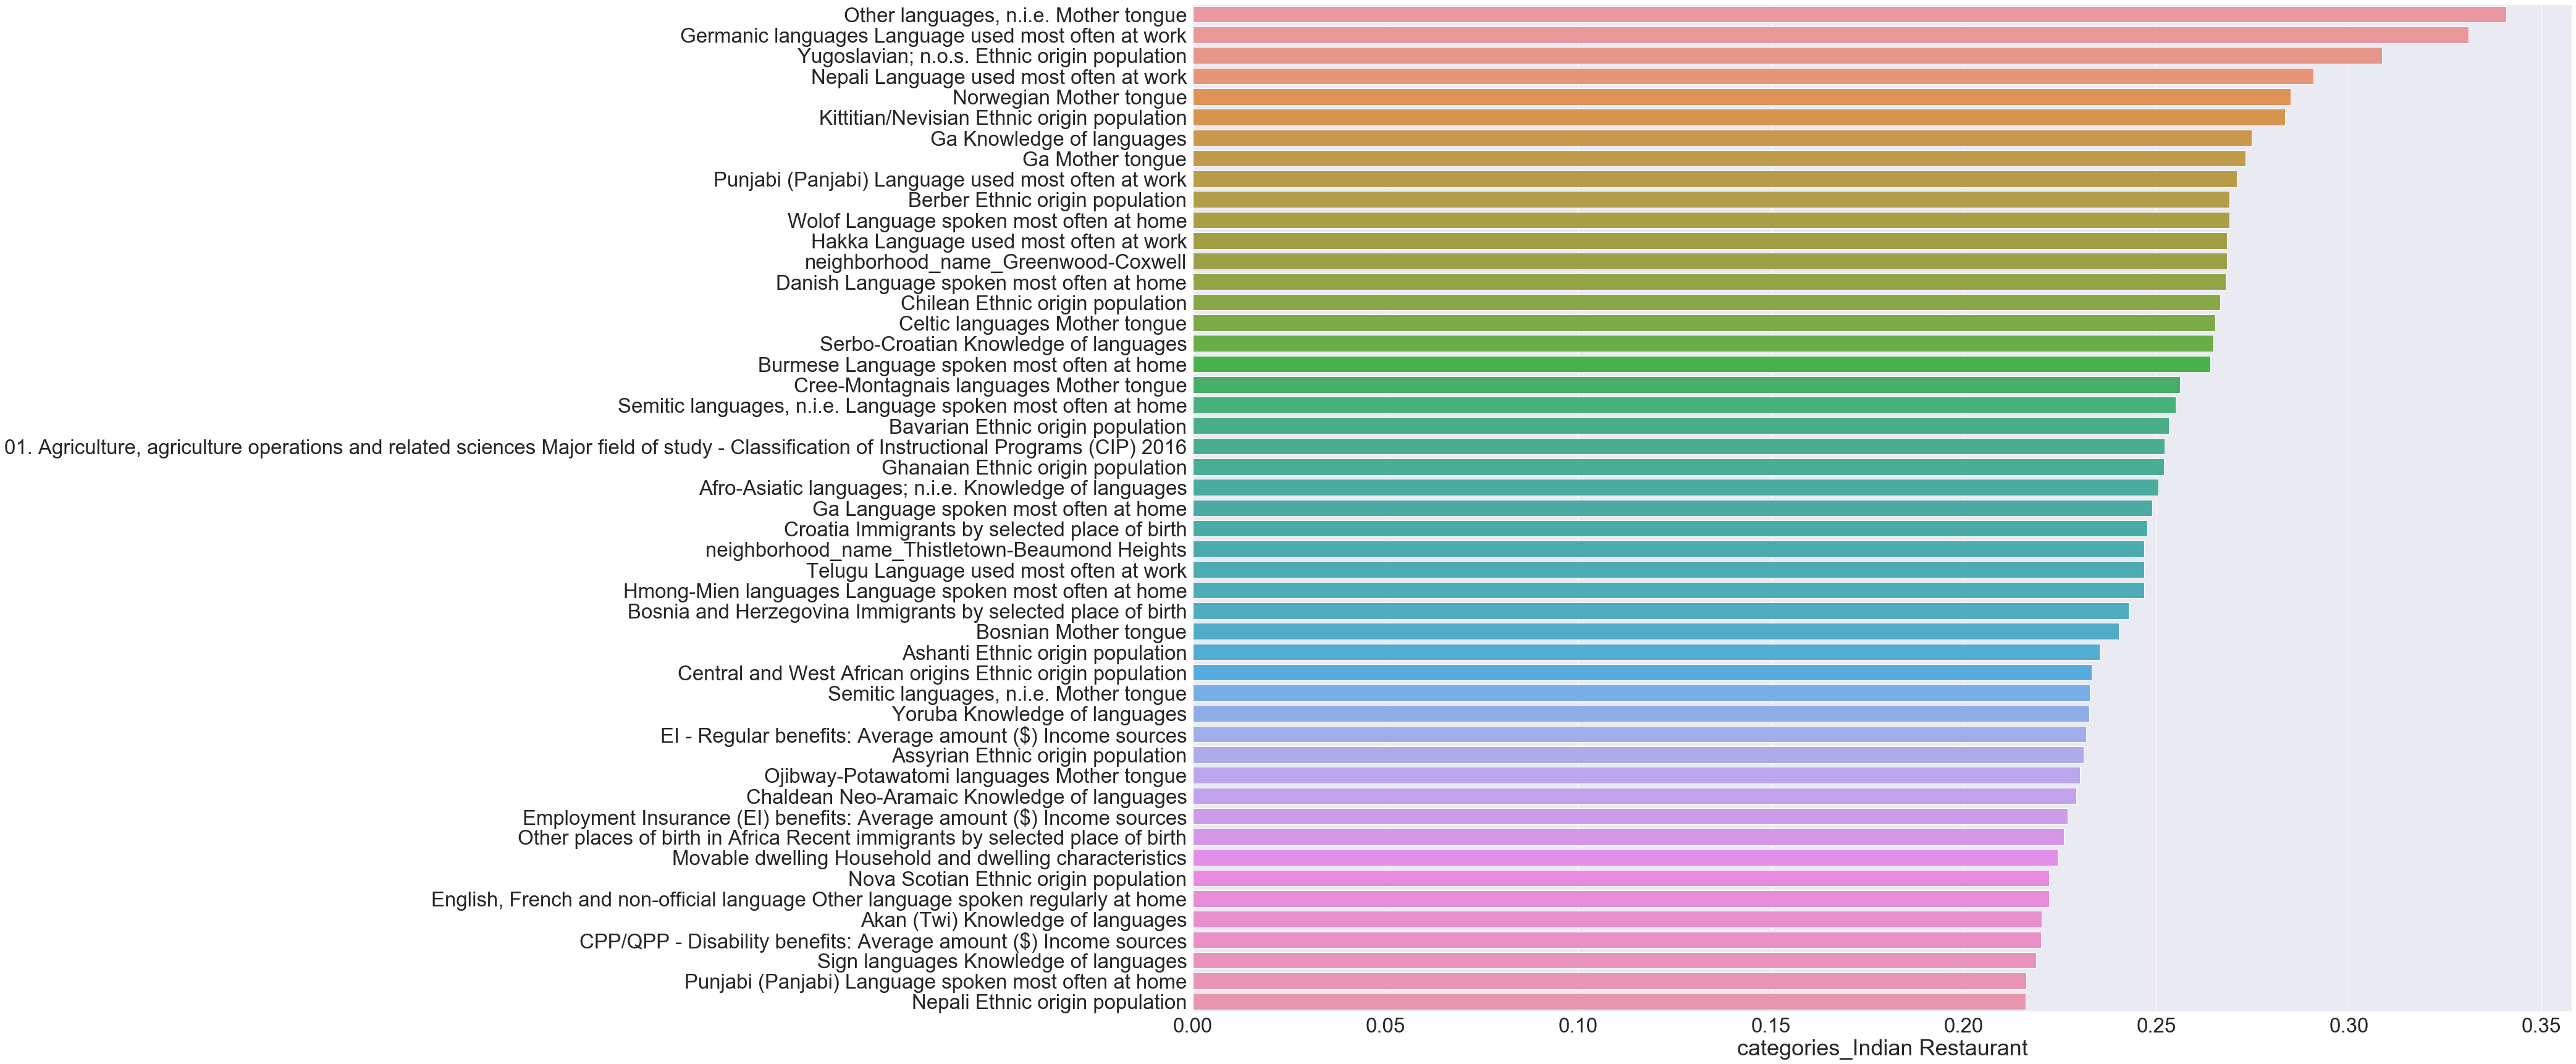

In [16]:
# categories_Indian Restaurant correlation
sns.set(rc={'figure.figsize':(40,30), "axes.labelsize":100})
sns.set(font_scale = 3)  
corr = correlation_restaurant['categories_Indian Restaurant'].to_frame().sort_values(by= 'categories_Indian Restaurant', ascending = False).iloc[1:50,:]
sns.barplot(x=corr['categories_Indian Restaurant'], y=corr.index)

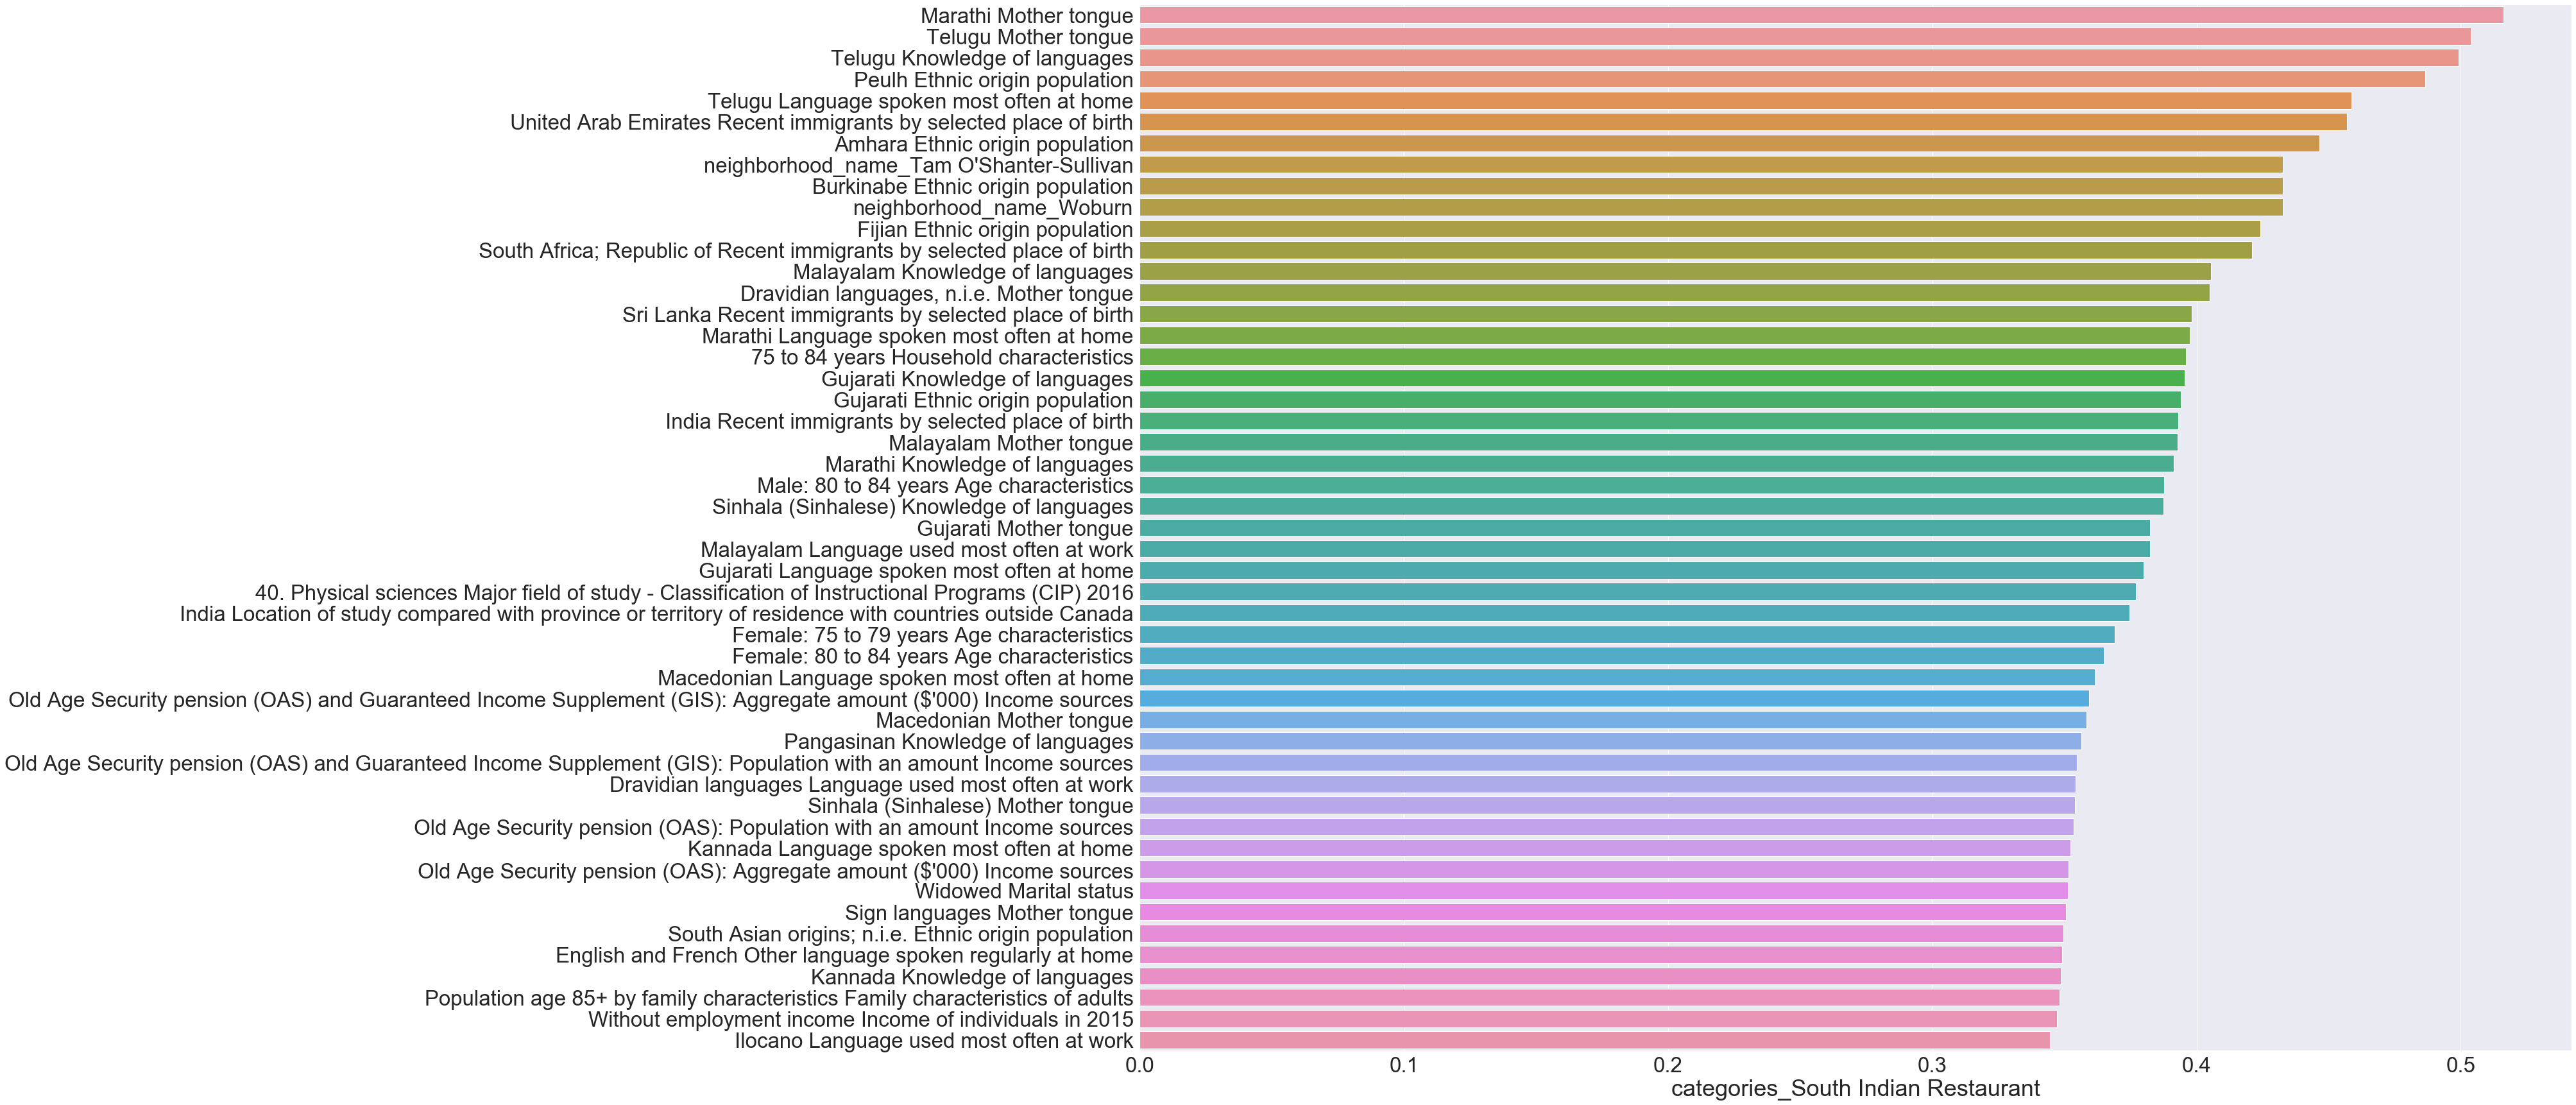

In [17]:
# categories_South Indian Restaurant correlation
corr = correlation_restaurant['categories_South Indian Restaurant'].to_frame().sort_values(by= 'categories_South Indian Restaurant', ascending = False).iloc[1:50,:]
sns.barplot(x=corr['categories_South Indian Restaurant'], y=corr.index)

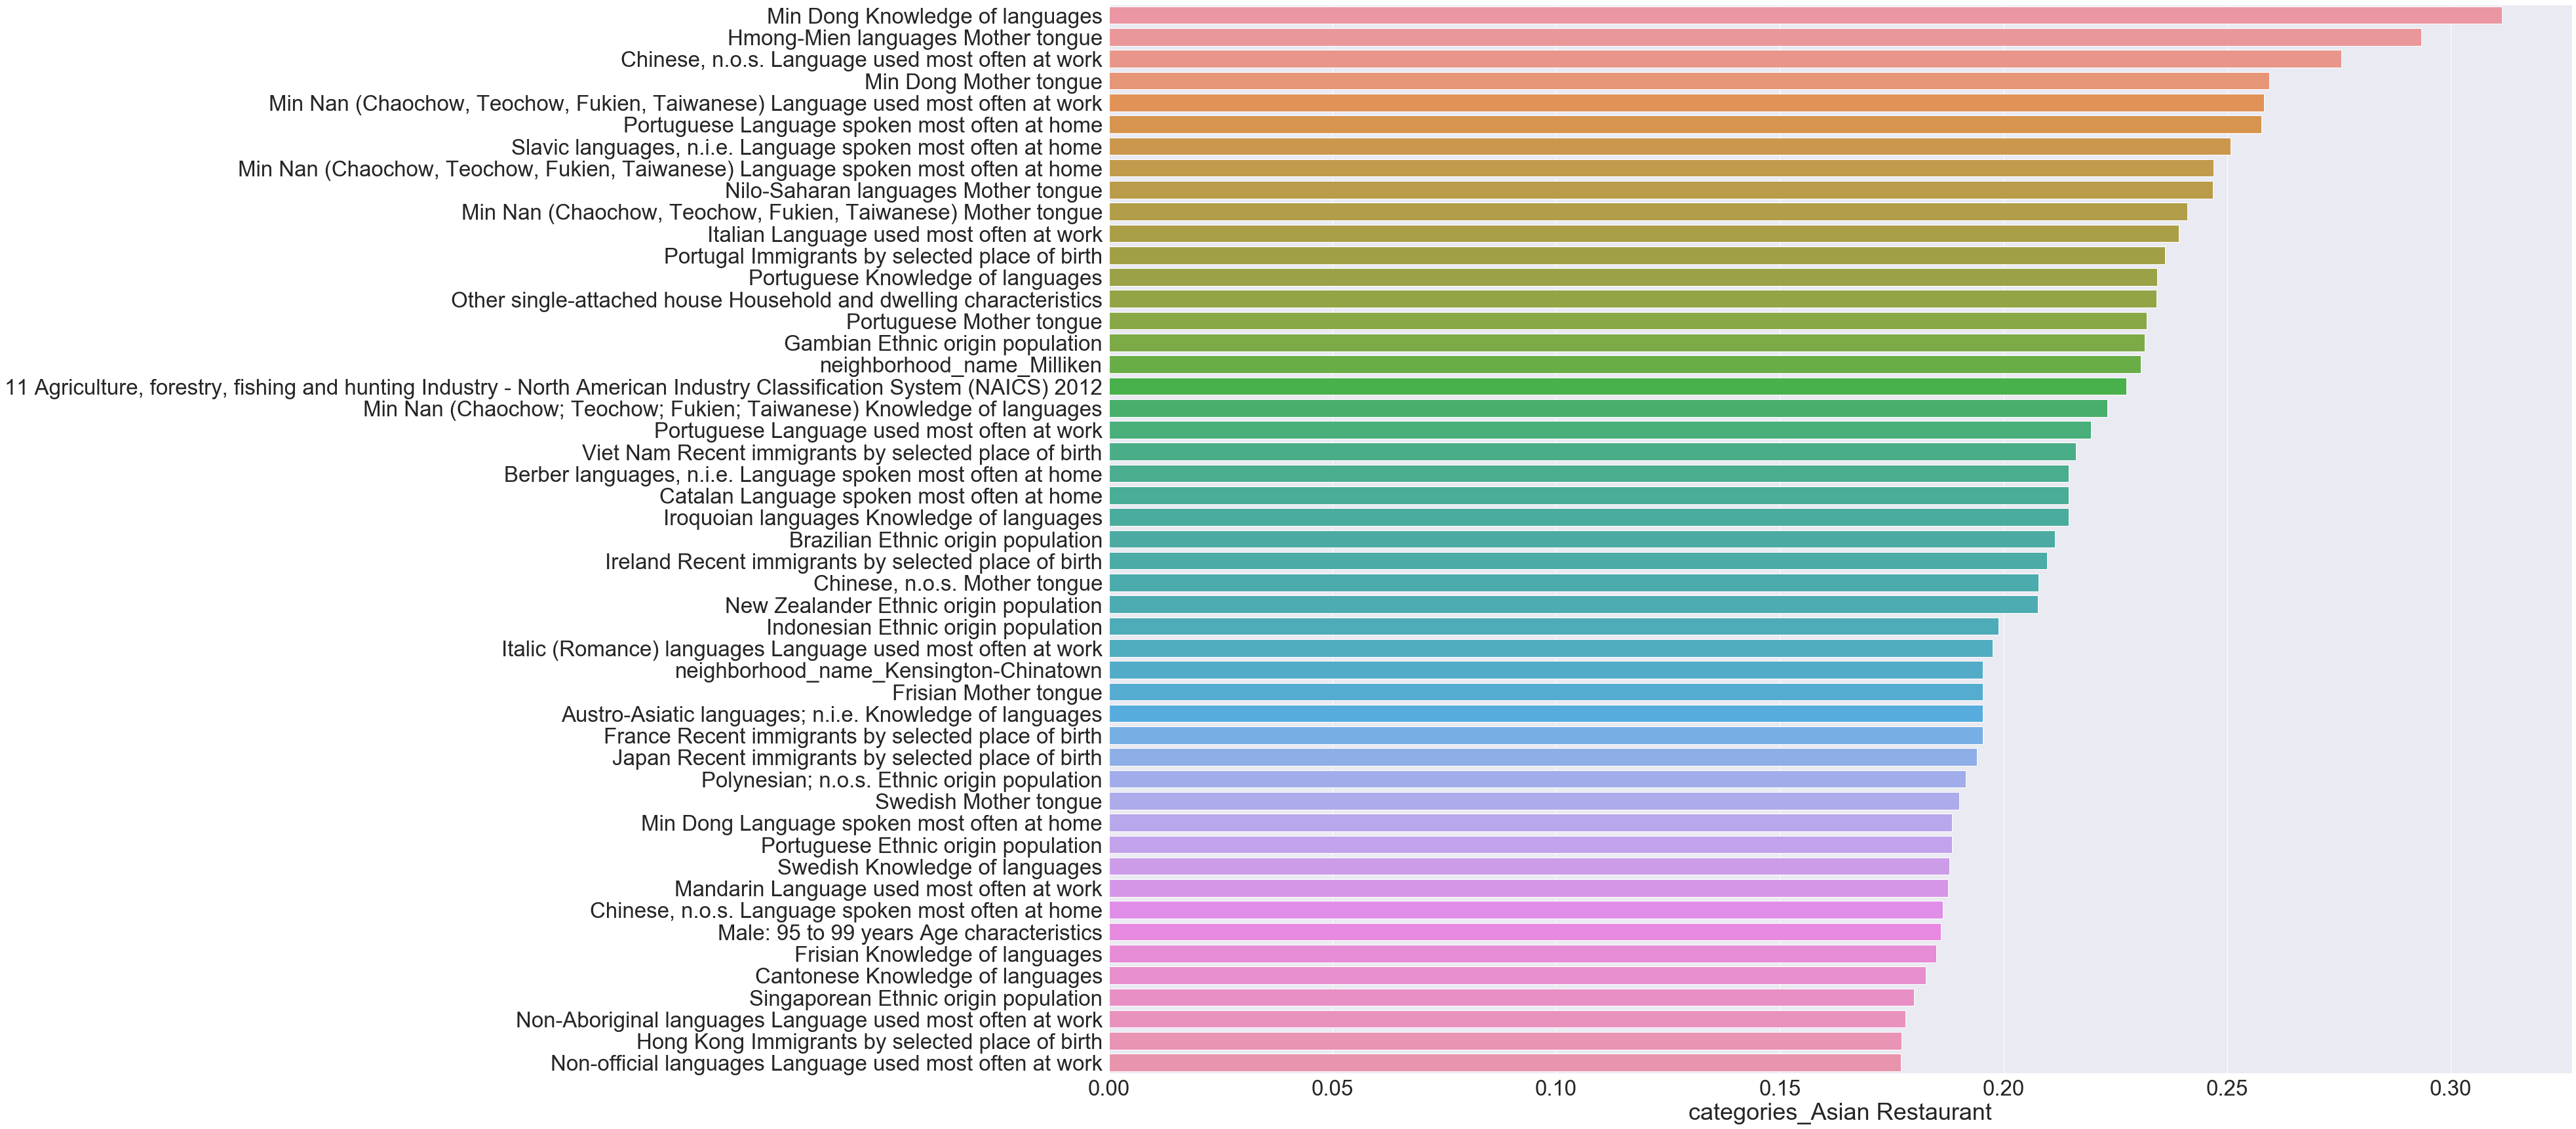

In [18]:
# categories_North Indian Restaurant correlation
corr = correlation_restaurant['categories_Asian Restaurant'].to_frame().sort_values(by= 'categories_Asian Restaurant', ascending = False).iloc[1:50,:]
sns.barplot(x=corr['categories_Asian Restaurant'], y=corr.index)

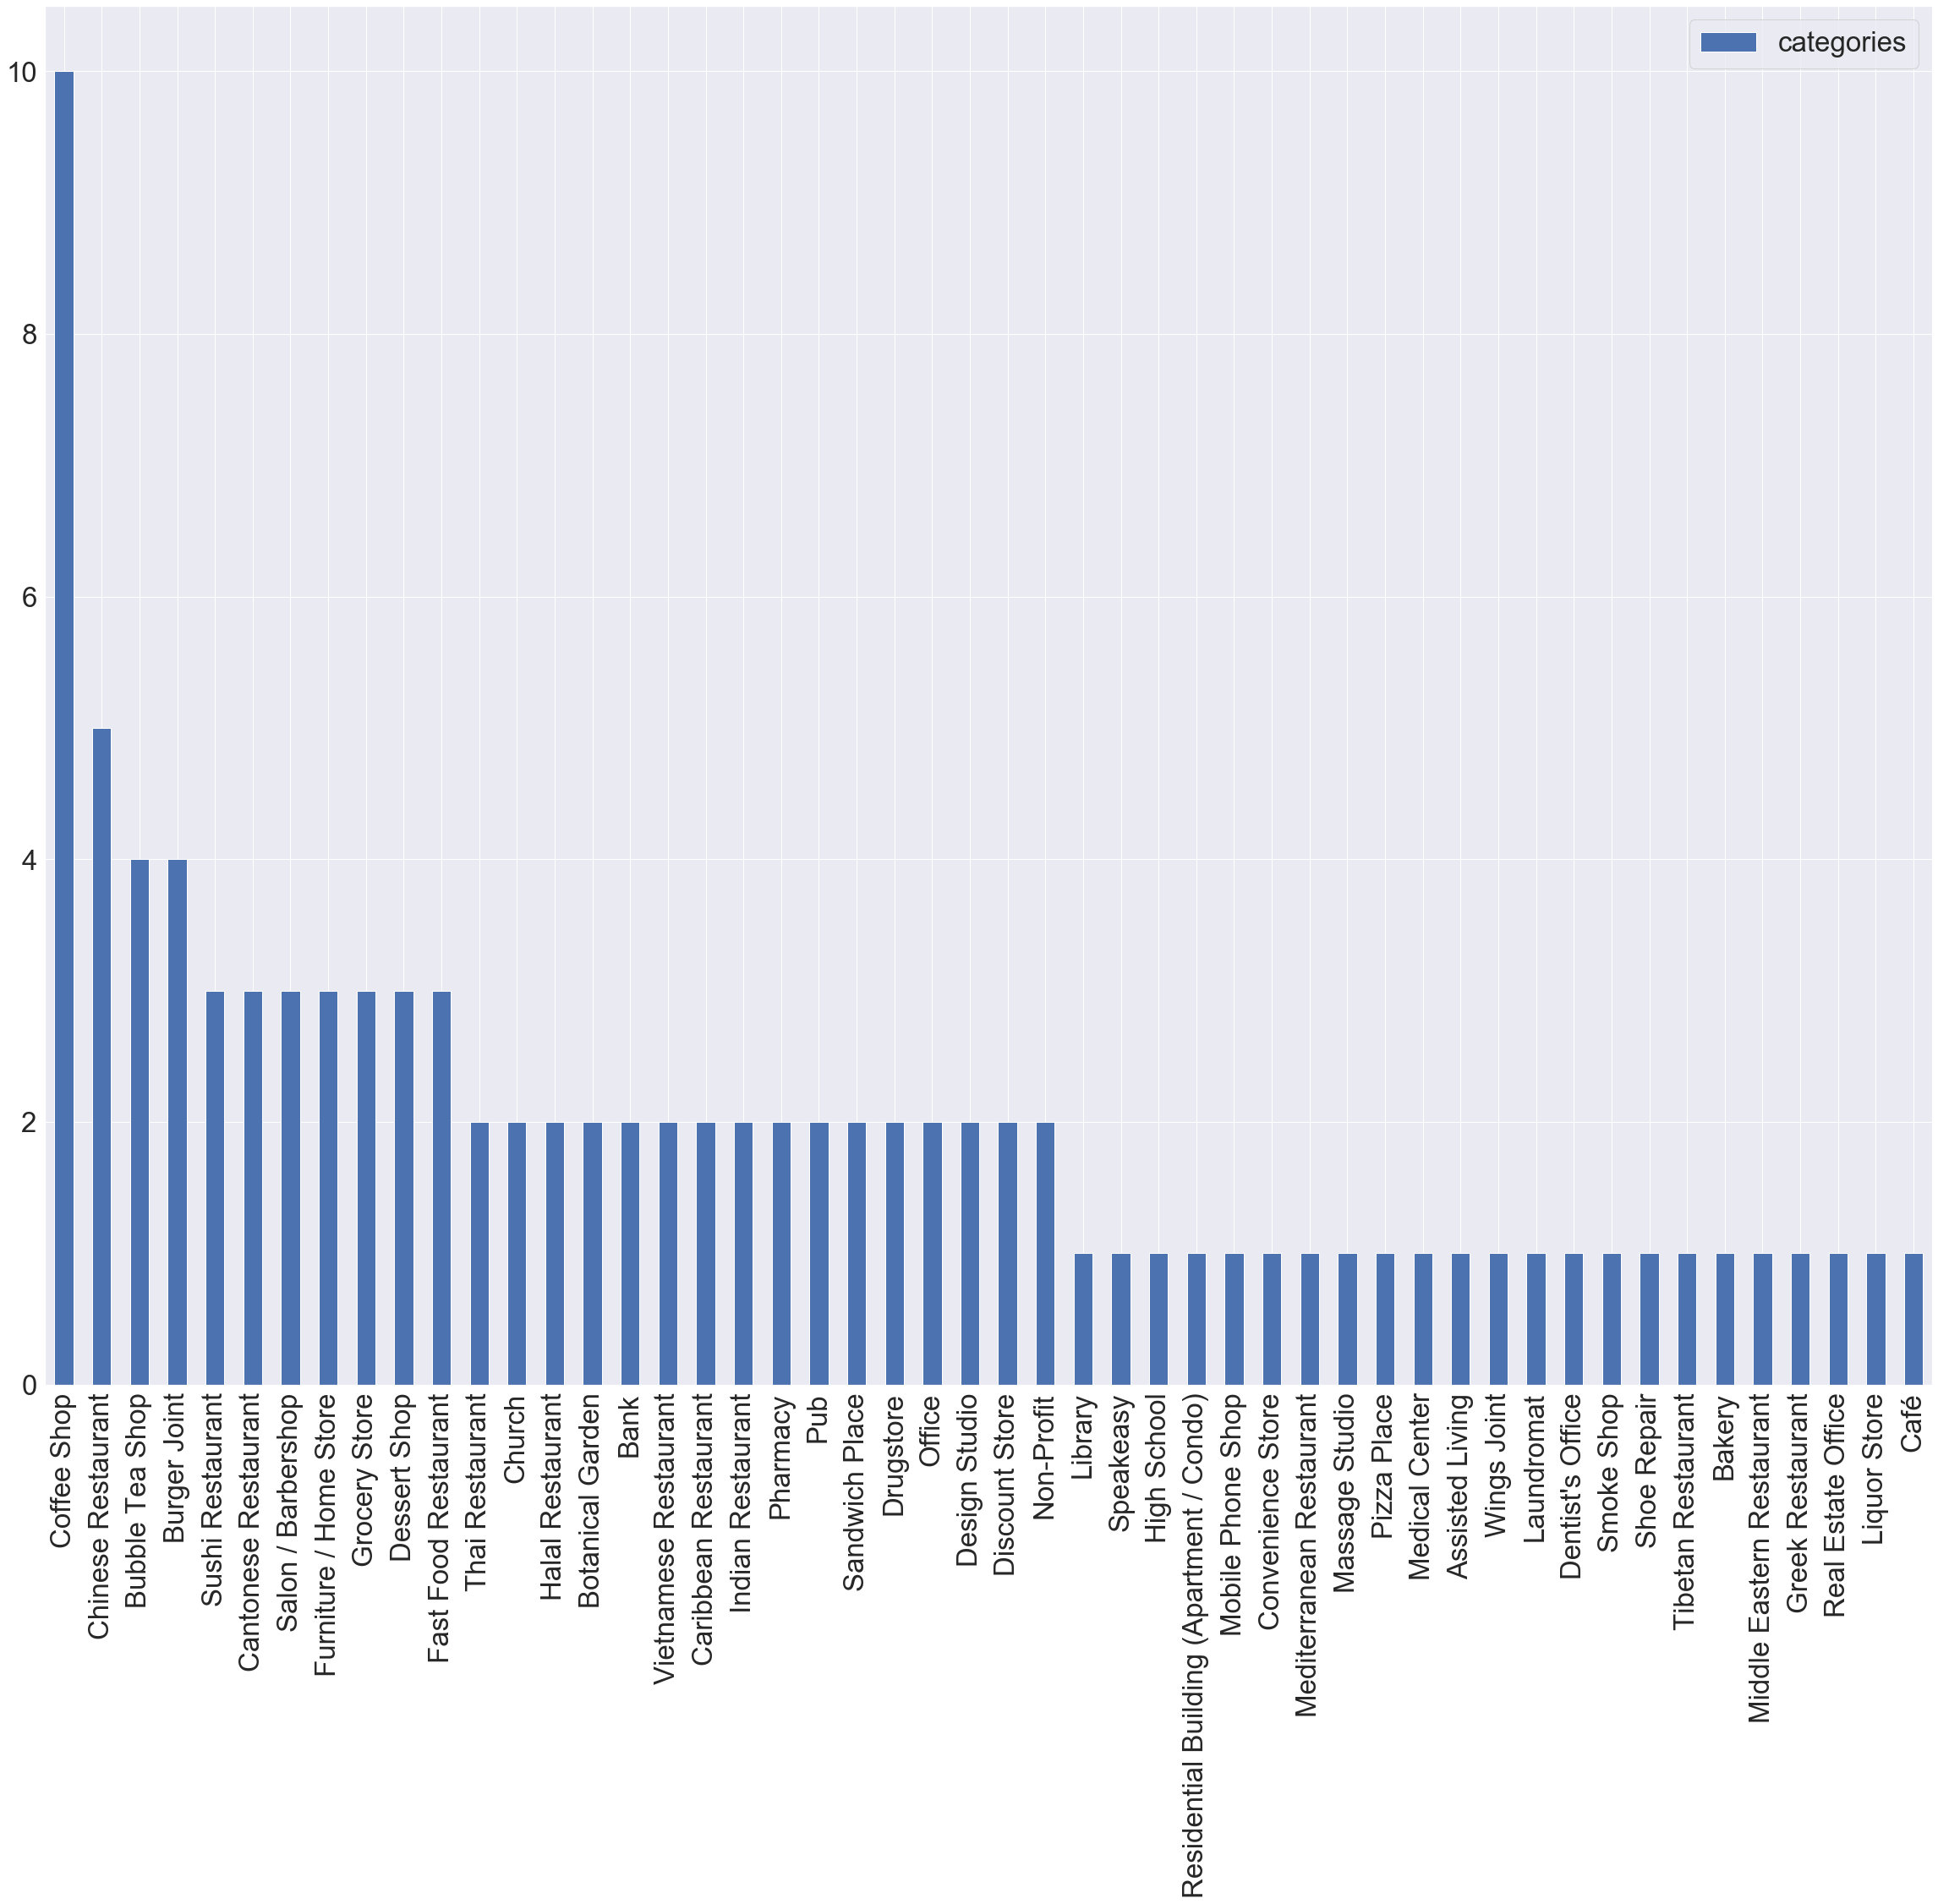

In [19]:
df_fc['categories'] = df_fc['categories'].fillna(value='NoN')
df_fc.dropna(inplace = True)
df_fc['categories'].value_counts().to_frame().head(50).plot(kind= 'bar')

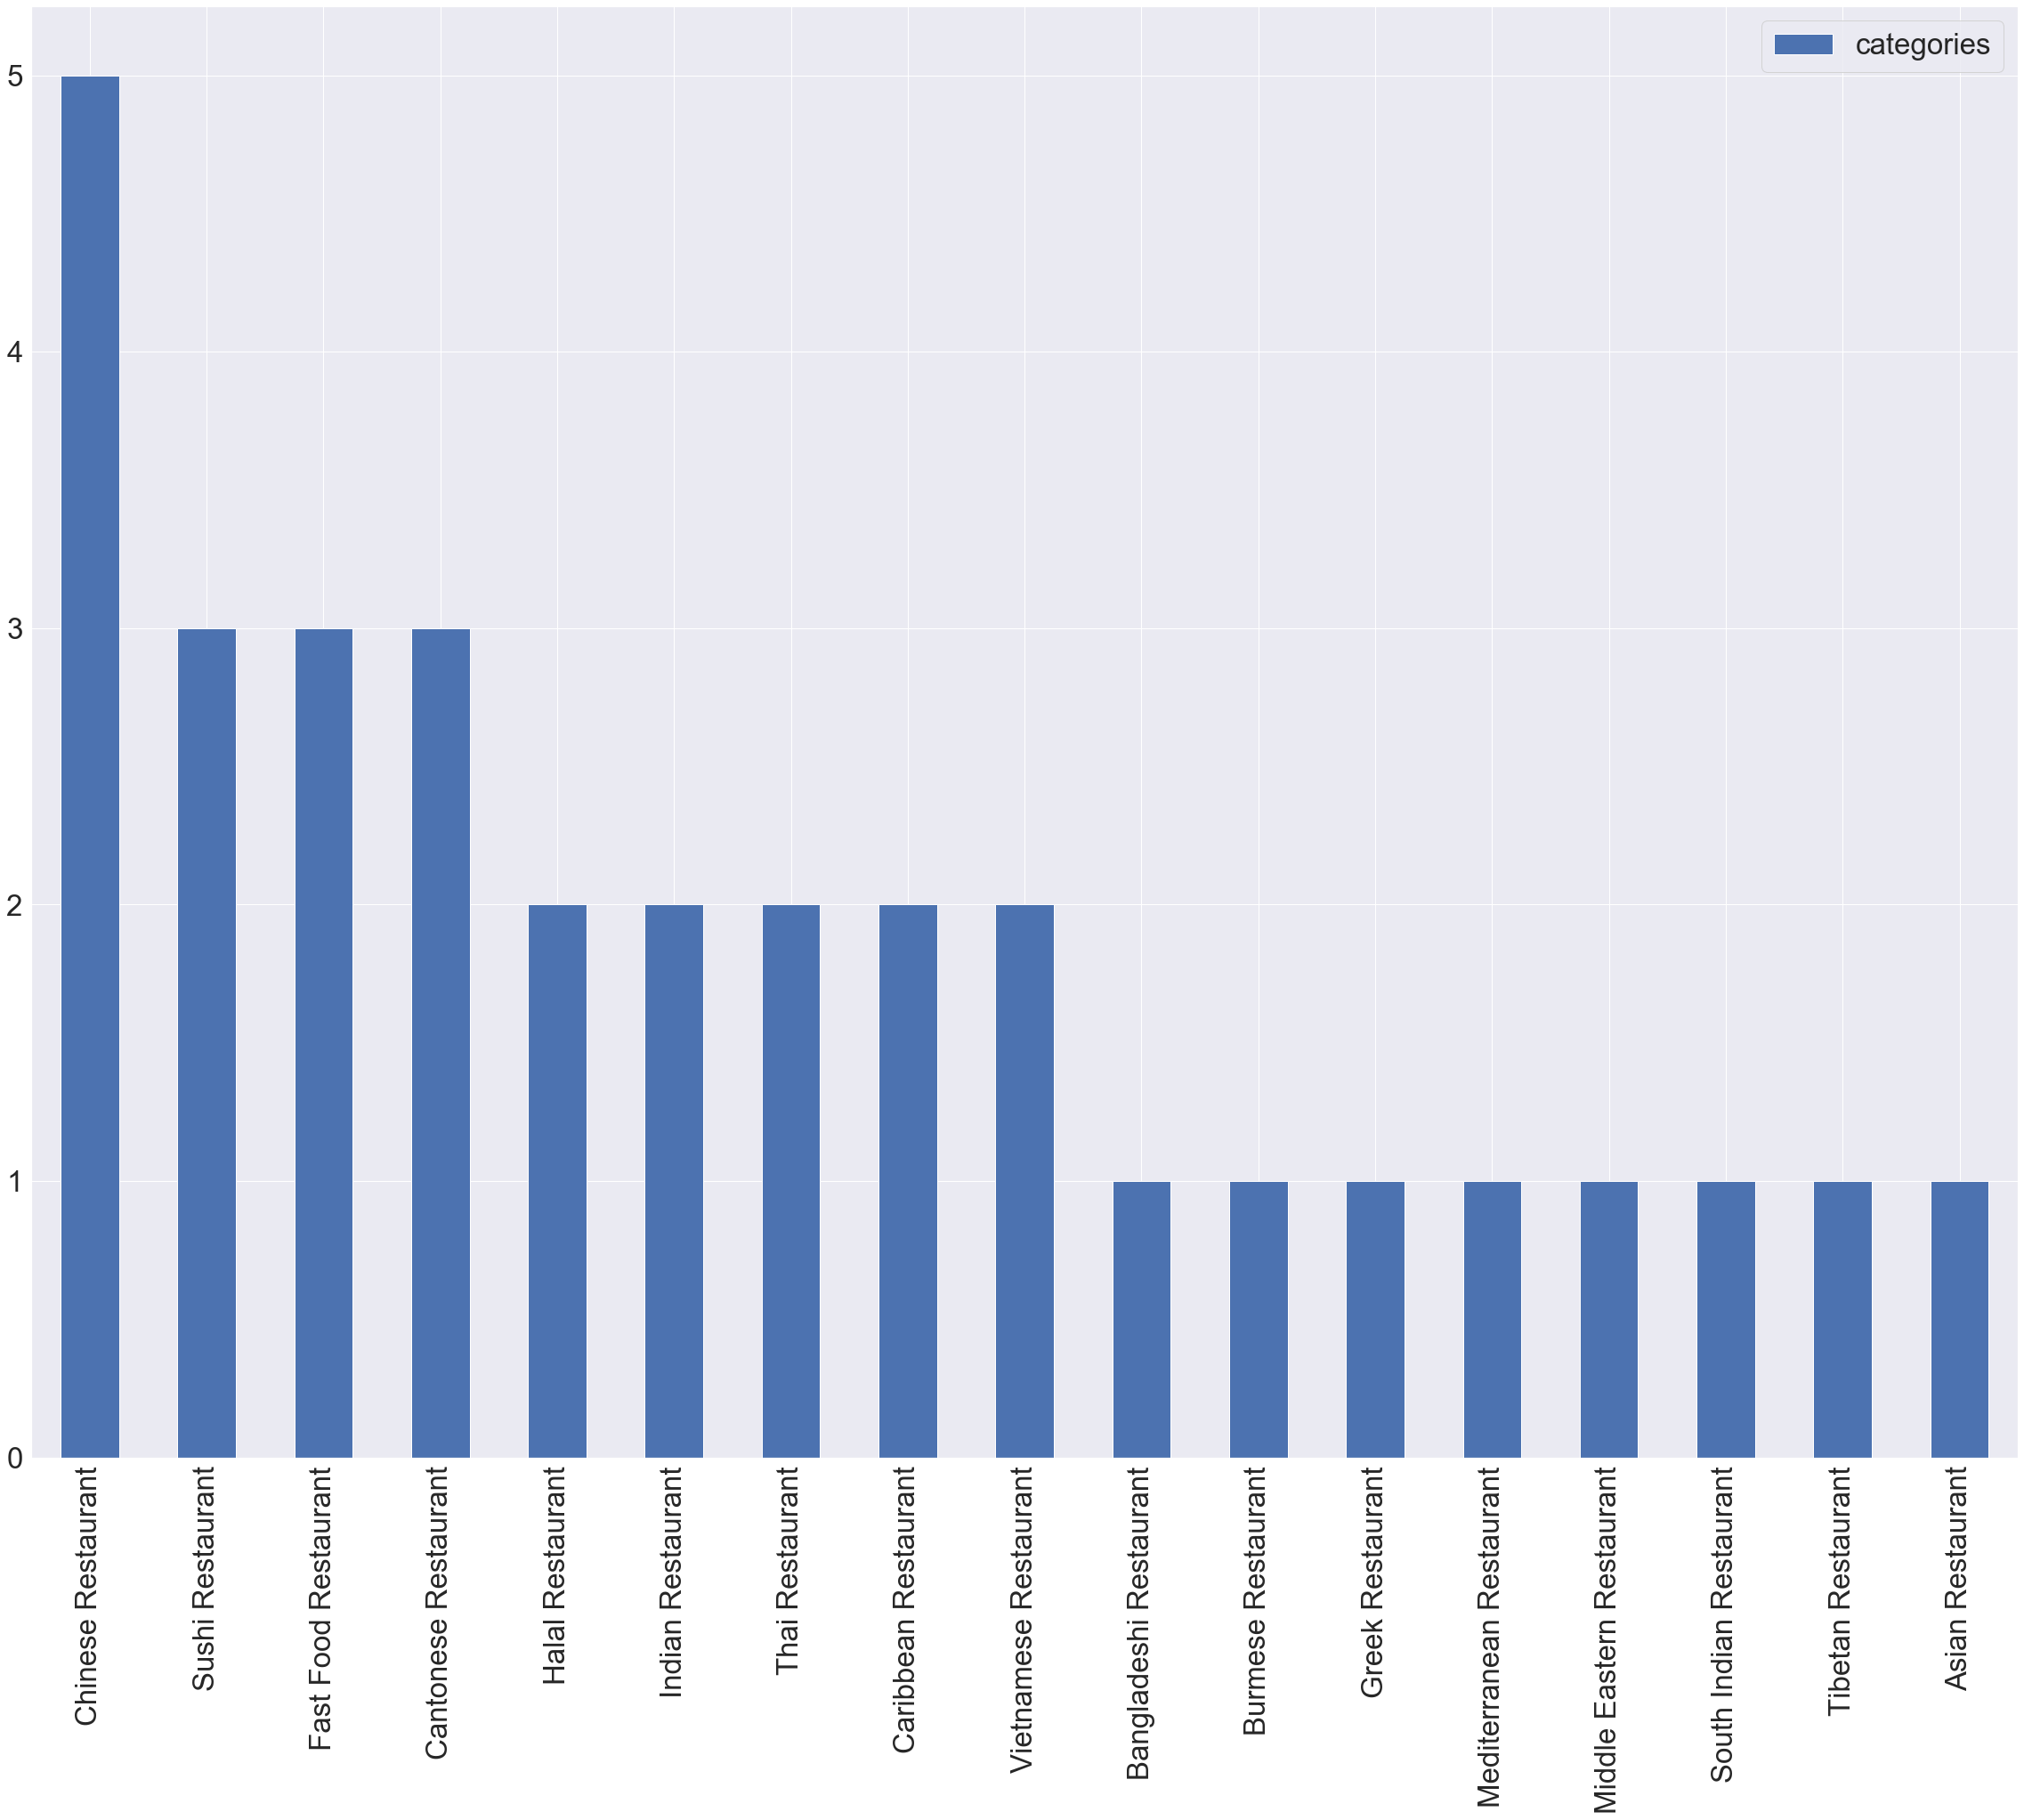

In [20]:
df_fc[df_fc['categories'].str.contains('Restaurant')]['categories'].value_counts().to_frame().head(50).plot(kind= 'bar')

-----------

We can notice that in general Asian cuisine restaurants are most desired by the people in Torronto.
Next most preferred restaunts are Indian cuisine restaurants under Asia specific restaurnats.

----

--CLUSTERING--

To perform analysis using cluster classification we will choose following features of neighborhoods:
1. Population
2. Population density
3. Persons living alone (per cent)
4. Total income: Average
5. Non-permanent residents Immigran
6. Youth (15-24 years)
7. Working Age (25-54 years)
8. females
9. Males
10. After-tax income
11. latitude and Longitude


In [21]:
df_Pop = df[['neighborhood_name','Population, 2016 Population and dwellings','Population density per square kilometre Population and dwellings', 'Persons living alone (per cent) Family characteristics of adults','Total income: Average amount ($) Income sources', 'Non-permanent residents Immigrant status and period of immigration', 'Youth (15-24 years) Age characteristics', 'Working Age (25-54 years) Age characteristics','Total - Population aged 15 years and over by Labour force status (Females) - 25% sample data Labour force status','Total - Population aged 15 years and over by Labour force status (Males) - 25% sample data Labour force status','After-tax income: Population with an amount Income sources','latitude', 'longitude']]
df_Pop.columns = ['neighborhood_name','Population','Population density', 'Persons living alone (per cent)', 'Total income: Average', 'Non-permanent residents Immigran', 'Youth (15-24 years)', 'Working Age (25-54 years)', 'females', 'Males', 'After-tax income','latitude', 'longitude']
print(df_Pop.shape)
df_Pop.head()

(140, 13)


neighborhood_name  Population  Population density  \
0               Agincourt North     29113.0              3929.0   
1  Agincourt South-Malvern West     23757.0              3034.0   
2                     Alderwood     12054.0              2435.0   
3                         Annex     30526.0             10863.0   
4             Banbury-Don Mills     27695.0              2775.0   

   Persons living alone (per cent)  Total income: Average  \
0                              5.4                30414.0   
1                              8.0                31825.0   
2                             10.8                47709.0   
3                             30.0               112766.0   
4                             18.6                67757.0   

   Non-permanent residents Immigran  Youth (15-24 years)  \
0                             930.0               3705.0   
1                            1175.0               3360.0   
2                              85.0               1235.0   
3                            1350.0               3750.0   
4                             485.0               2730.0   

   Working Age (25-54 years)  females    Males  After-tax income   latitude  \
0                    11305.0  13150.0  11850.0           23505.0  43.808038   
1                     9965.0  10460.0   9935.0           19370.0  43.792500   
2                     5220.0   5230.0   5035.0            9920.0  43.601717   
3                    15040.0  13865.0  12425.0           25620.0  43.670338   
4                    10810.0  12685.0  10705.0           22335.0  43.734804   

   longitude  
0 -79.266439  
1 -79.283889  
2 -79.545232  
3 -79.407117  
4 -79.357243

In [22]:
# normalisation features 
scaler = Normalizer()
df_Pop_norm = scaler.fit_transform(df_Pop[['Population','Population density', 'Persons living alone (per cent)', 'Total income: Average', 'Non-permanent residents Immigran', 'Youth (15-24 years)', 'Working Age (25-54 years)', 'After-tax income']])
pd.DataFrame(df_Pop_norm).head()

0         1         2         3         4         5         6  \
0  0.584262  0.078850  0.000108  0.610372  0.018664  0.074355  0.226877   
1  0.521710  0.066627  0.000176  0.698885  0.025803  0.073786  0.218834   
2  0.238491  0.048177  0.000214  0.943935  0.001682  0.024435  0.103279   
3  0.252079  0.089705  0.000248  0.931204  0.011148  0.030967  0.124198   
4  0.357865  0.035858  0.000240  0.875533  0.006267  0.035276  0.139683   

          7  
0  0.471716  
1  0.425370  
2  0.196270  
3  0.211566  
4  0.288605

In [23]:
# calculates the score of each neighborhood
score = np.sum(df_Pop_norm, axis=1)
df_Pop = df_Pop.copy()
df_Pop.loc[:,'score'] = score
df_Pop.head()

neighborhood_name  Population  Population density  \
0               Agincourt North     29113.0              3929.0   
1  Agincourt South-Malvern West     23757.0              3034.0   
2                     Alderwood     12054.0              2435.0   
3                         Annex     30526.0             10863.0   
4             Banbury-Don Mills     27695.0              2775.0   

   Persons living alone (per cent)  Total income: Average  \
0                              5.4                30414.0   
1                              8.0                31825.0   
2                             10.8                47709.0   
3                             30.0               112766.0   
4                             18.6                67757.0   

   Non-permanent residents Immigran  Youth (15-24 years)  \
0                             930.0               3705.0   
1                            1175.0               3360.0   
2                              85.0               1235.0   
3                            1350.0               3750.0   
4                             485.0               2730.0   

   Working Age (25-54 years)  females    Males  After-tax income   latitude  \
0                    11305.0  13150.0  11850.0           23505.0  43.808038   
1                     9965.0  10460.0   9935.0           19370.0  43.792500   
2                     5220.0   5230.0   5035.0            9920.0  43.601717   
3                    15040.0  13865.0  12425.0           25620.0  43.670338   
4                    10810.0  12685.0  10705.0           22335.0  43.734804   

   longitude     score  
0 -79.266439  2.065205  
1 -79.283889  2.031193  
2 -79.545232  1.556482  
3 -79.407117  1.651114  
4 -79.357243  1.739328

In [42]:
# keep the 50 best neighborhoods according to the scorE, then join the result with the sites available in these neighborhoods 
# by keeping that restaurants.
df_Pop = df_Pop.sort_values(by = 'score', ascending = False).head(50)
df_venues = df_Pop.merge(df_fc[df_fc['categories'].str.contains('Restaurant|NoN')], left_on=df_Pop.index, right_on='Neighborhoods', how  = 'left')
df_venues['categories']=df_venues['categories'].fillna('Asian Restaurant')
print(df_venues.shape)
df_venues.head(53)

(54, 33)


neighborhood_name  Population  Population density  \
0                       Willowdale East     50434.0             10087.0   
1                       Willowdale East     50434.0             10087.0   
2                 Church-Yonge Corridor     31340.0             23044.0   
3     Mount Olive-Silverstone-Jamestown     32954.0              7291.0   
4   Dovercourt-Wallace Emerson-Junction     36625.0              9819.0   
5     Waterfront Communities-The Island     65913.0              8943.0   
6                       Flemingdon Park     21933.0              9026.0   
7                Glenfield-Jane Heights     30491.0              5864.0   
8                           Black Creek     21737.0              6282.0   
9                   Westminster-Branson     26274.0              7339.0   
10                           L'Amoreaux     43993.0              6144.0   
11                              Malvern     43794.0              4948.0   
12                       South Parkdale     21849.0              9583.0   
13                       South Parkdale     21849.0              9583.0   
14                  Mount Pleasant West     29658.0             21969.0   
15                        Eglinton East     22776.0              7051.0   
16              York University Heights     27593.0              2086.0   
17                              Bendale     29960.0              4011.0   
18                  Bay Street Corridor     25797.0             14097.0   
19                        Taylor-Massey     15683.0             15528.0   
20                               Woburn     53485.0              4345.0   
21                     Thorncliffe Park     21108.0              6787.0   
22                      Agincourt North     29113.0              3929.0   
23                   Don Valley Village     27051.0              6441.0   
24               West Humber-Clairville     33312.0              1117.0   
25                 Kensington-Chinatown     17945.0             11806.0   
26                 Kensington-Chinatown     17945.0             11806.0   
27                 Kensington-Chinatown     17945.0             11806.0   
28                              Steeles     24623.0              5436.0   
29                             Milliken     26572.0              2830.0   
30                     Newtonbrook West     23831.0              5070.0   
31               Tam O'Shanter-Sullivan     27446.0              5073.0   
32                 North St. James Town     18615.0             44321.0   
33                 Downsview-Roding-CFB     35052.0              2337.0   
34                    Parkwoods-Donalda     34805.0              4691.0   
35                          Dorset Park     25003.0              4146.0   
36         Agincourt South-Malvern West     23757.0              3034.0   
37                                Rouge     46496.0              1260.0   
38                            West Hill     27392.0              2856.0   
39                  Clairlea-Birchmount     26984.0              3632.0   
40           Islington-City Centre West     43965.0              2712.0   
41                     Wexford/Maryvale     27917.0              2724.0   
42                      Oakwood Village     21210.0              9511.0   
43                             Oakridge     13845.0              7444.0   
44                    Rockcliffe-Smythe     22246.0              4414.0   
45                               Weston     17992.0              7197.0   
46  Mimico (includes Humber Bay Shores)     33964.0              4915.0   
47                  Brookhaven-Amesbury     17757.0              5045.0   
48        Kingsview Village-The Westway     22000.0              4356.0   
49                         Kennedy Park     17123.0              4770.0   
50                              Niagara     31180.0             10156.0   
51                           Henry Farm     15723.0              6047.0   
52                  Scarborough Village     167

In [43]:
# count the number of neighborhood restaurants and add it as a new feature for the training dataset.
# I removed a 1 for the values NoN, so that they are not counted as a restaurant
df_Pop.loc[:,'Number_of_Restaurant'] = df_venues.groupby(['Neighborhoods']).count()['Population']
df_Pop['Number_of_Restaurant'] = df_Pop['Number_of_Restaurant']
print(df_Pop.shape)
df_Pop.head()

(50, 16)


neighborhood_name  Population  Population density  \
129                      Willowdale East     50434.0             10087.0   
23                 Church-Yonge Corridor     31340.0             23044.0   
81     Mount Olive-Silverstone-Jamestown     32954.0              7291.0   
32   Dovercourt-Wallace Emerson-Junction     36625.0              9819.0   
122    Waterfront Communities-The Island     65913.0              8943.0   

     Persons living alone (per cent)  Total income: Average  \
129                             16.6                45326.0   
23                              39.2                53583.0   
81                               5.9                26548.0   
32                              14.6                39740.0   
122                             35.6                70600.0   

     Non-permanent residents Immigran  Youth (15-24 years)  \
129                            5080.0               6940.0   
23                             2745.0               5060.0   
81                              900.0               5240.0   
32                             1185.0               3925.0   
122                            4775.0               7840.0   

     Working Age (25-54 years)  females    Males  After-tax income   latitude  \
129                    25850.0  23830.0  20505.0           41565.0  43.761509   
23                     18780.0  13140.0  15955.0           28370.0  43.679919   
81                     13615.0  13385.0  12360.0           23850.0  43.739722   
32                     19790.0  16220.0  15545.0           30705.0  43.663000   
122                    45105.0  30685.0  31300.0           60630.0  43.620833   

     longitude     score  Number_of_Restaurant  labels  
129 -79.410923  2.188386                     2       3  
23  -79.388689  2.182529                     1       0  
81  -79.580278  2.154298                     1       0  
32  -79.441000  2.145507                     1       0  
122 -79.378611  2.139786                     1       0

In [44]:
# Fit the K Means on the learning data and assign a label to each neighborhood
X = df_Pop[['latitude','longitude', 'score','Number_of_Restaurant']]
scaler = StandardScaler()
X= scaler.fit_transform(X)
KM = KMeans(n_clusters=4, random_state=0).fit(X)
df_Pop.loc[:,'labels'] = KM.labels_

------

In [46]:
# assign a color to each cluster and display it on the map

colors = ['red', 'blue', 'green', 'yellow']

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

def plotDot(point):
    '''input: series that contains a numeric named latitude and a numeric named longitude
    this function creates a CircleMarker and adds it to your this_map'''
    folium.CircleMarker(location=[point.latitude, point.longitude],
                        radius=1,
                        color = np.array(colors)[int(point.labels)],
                        label = point.index,
                        weight=12).add_to(map_clusters)

#use df.apply(,axis=1) to "iterate" through every row in your dataframe
df_Pop.apply(plotDot, axis = 1)


#Set the zoom to the maximum possible
map_clusters.fit_bounds(map_clusters.get_bounds())

#Save the map to an HTML file
# this_map.save('html_map_output/simple_dot_plot.html')

map_clusters

In [47]:
print(df_Pop[df_Pop.labels == 0 ].shape)
print('average Number_of_Restaurant cluster 1 : '+ str(df_Pop[df_Pop.labels == 0 ]['Number_of_Restaurant'].sum()))
print('average score cluster 1 : ' + str(df_Pop[df_Pop.labels == 0 ]['score'].mean()))
df_Pop[df_Pop.labels == 0 ].head()

(32, 16)
average Number_of_Restaurant cluster 1 : 32
average score cluster 1 : 2.0777936138153117


neighborhood_name  Population  Population density  \
23                 Church-Yonge Corridor     31340.0             23044.0   
81     Mount Olive-Silverstone-Jamestown     32954.0              7291.0   
32   Dovercourt-Wallace Emerson-Junction     36625.0              9819.0   
122    Waterfront Communities-The Island     65913.0              8943.0   
42                       Flemingdon Park     21933.0              9026.0   

     Persons living alone (per cent)  Total income: Average  \
23                              39.2                53583.0   
81                               5.9                26548.0   
32                              14.6                39740.0   
122                             35.6                70600.0   
42                              11.3                28654.0   

     Non-permanent residents Immigran  Youth (15-24 years)  \
23                             2745.0               5060.0   
81                              900.0               5240.0   
32                             1185.0               3925.0   
122                            4775.0               7840.0   
42                              890.0               3060.0   

     Working Age (25-54 years)  females    Males  After-tax income   latitude  \
23                     18780.0  13140.0  15955.0           28370.0  43.679919   
81                     13615.0  13385.0  12360.0           23850.0  43.739722   
32                     19790.0  16220.0  15545.0           30705.0  43.663000   
122                    45105.0  30685.0  31300.0           60630.0  43.620833   
42                      9185.0   9240.0   8295.0           16180.0  43.718432   

     longitude     score  Number_of_Restaurant  labels  
23  -79.388689  2.182529                     1       0  
81  -79.580278  2.154298                     1       0  
32  -79.441000  2.145507                     1       0  
122 -79.378611  2.139786                     1       0  
42  -79.333204  2.132224                     1       0

In [48]:
print(df_Pop[df_Pop.labels == 1 ].shape)
print('average Number_of_Restaurant cluster 2 : '+ str(df_Pop[df_Pop.labels == 1 ]['Number_of_Restaurant'].sum()))
print('average score cluster 2 : '+ str(df_Pop[df_Pop.labels == 1 ]['score'].mean()))
df_Pop[df_Pop.labels == 1 ].head()

(1, 16)
average Number_of_Restaurant cluster 2 : 1
average score cluster 2 : 1.9942055781898618


neighborhood_name  Population  Population density  \
90          Oakridge     13845.0              7444.0   

    Persons living alone (per cent)  Total income: Average  \
90                             16.6                26793.0   

    Non-permanent residents Immigran  Youth (15-24 years)  \
90                             425.0               1680.0   

    Working Age (25-54 years)  females   Males  After-tax income  latitude  \
90                     6050.0   5460.0  5285.0           10060.0  43.74669   

     longitude     score  Number_of_Restaurant  labels  
90 -122.459741  1.994206                     1       1

In [49]:
print(df_Pop[df_Pop.labels ==2 ].shape)
print('average Number_of_Restaurant cluster 3 : '+ str(df_Pop[df_Pop.labels == 2]['Number_of_Restaurant'].sum()))
print('average score cluster 3 : '+ str(df_Pop[df_Pop.labels ==2]['score'].mean()))
df_Pop[df_Pop.labels ==2].head(14)

(14, 16)
average Number_of_Restaurant cluster 3 : 14
average score cluster 3 : 1.9723093321551832


neighborhood_name  Population  Population density  \
89                  North St. James Town     18615.0             44321.0   
24                   Clairlea-Birchmount     26984.0              3632.0   
58            Islington-City Centre West     43965.0              2712.0   
91                       Oakwood Village     21210.0              9511.0   
102                    Rockcliffe-Smythe     22246.0              4414.0   
126                               Weston     17992.0              7197.0   
77   Mimico (includes Humber Bay Shores)     33964.0              4915.0   
18                   Brookhaven-Amesbury     17757.0              5045.0   
63         Kingsview Village-The Westway     22000.0              4356.0   
61                          Kennedy Park     17123.0              4770.0   
87                               Niagara     31180.0             10156.0   
48                            Henry Farm     15723.0              6047.0   
108                  Scarborough Village     16724.0              5395.0   
55                            Humbermede     15545.0              3565.0   

     Persons living alone (per cent)  Total income: Average  \
89                              28.2                32648.0   
24                               8.8                36232.0   
58                              17.8                52787.0   
91                              14.9                39803.0   
102                             15.9                34059.0   
126                             19.2                32997.0   
77                              27.5                54438.0   
18                              10.8                32483.0   
63                               9.9                36674.0   
61                              14.0                30974.0   
87                              35.5                70623.0   
48                              13.6                36359.0   
108                             11.7                32913.0   
55                               6.8                29528.0   

     Non-permanent residents Immigran  Youth (15-24 years)  \
89                             1470.0               2265.0   
24                              530.0               3495.0   
58                             1195.0               4695.0   
91                              725.0               2275.0   
102                             445.0               2740.0   
126                             520.0               2225.0   
77                              940.0               3010.0   
18                              390.0               2460.0   
63                              450.0               3020.0   
61                              255.0               2175.0   
87                             1185.0               2415.0   
48                             1985.0               2330.0   
108                             415.0               2360.0   
55                              360.0               2225.0   

     Working Age (25-54 years)  females    Males  After-tax income   latitude  \
89                     10350.0   7525.0   8550.0           15300.0  43.669403   
24                     11940.0  11305.0  10440.0           20490.0  43.716200   
58                     20640.0  19670.0  17755.0           36115.0  43.630900   
91                      9535.0   9495.0   8355.0           17120.0  43.692500   
102                     9255.0   9725.0   9010.0           17775.0  43.676900   
126                     7785.0   7745.0   6865.0           13865.0  43.700989   
77                     17695.0  15595.0  14240.0           29015.0  43.612778   
18                      7625.0   7850.0   6495.0           13500.0  43.696900   
63                      8635.0   9350.0   8400.0           16770.0  43.692646   
61                      7120.0   7470.0   6860.0           13505.0  43.716667   
87                     23320.0  14535.0  13865.0           27940.0  43.643000   
48                      8045.0   

In [50]:
df_Pop[df_Pop.labels ==2]['neighborhood_name']

89                    North St. James Town
24                     Clairlea-Birchmount
58              Islington-City Centre West
91                         Oakwood Village
102                      Rockcliffe-Smythe
126                                 Weston
77     Mimico (includes Humber Bay Shores)
18                     Brookhaven-Amesbury
63           Kingsview Village-The Westway
61                            Kennedy Park
87                                 Niagara
48                              Henry Farm
108                    Scarborough Village
55                              Humbermede
Name: neighborhood_name, dtype: object

In [51]:
print(df_Pop[df_Pop.labels ==3 ].shape)
print('average Number_of_Restaurant cluster 4 : '+ str(df_Pop[df_Pop.labels == 3]['Number_of_Restaurant'].sum()))
print('average score cluster 4 : '+ str(df_Pop[df_Pop.labels ==3]['score'].mean()))
df_Pop[df_Pop.labels ==3].head()

(3, 16)
average Number_of_Restaurant cluster 4 : 7
average score cluster 4 : 2.1107313407904496


neighborhood_name  Population  Population density  \
129       Willowdale East     50434.0             10087.0   
109        South Parkdale     21849.0              9583.0   
62   Kensington-Chinatown     17945.0             11806.0   

     Persons living alone (per cent)  Total income: Average  \
129                             16.6                45326.0   
109                             31.4                35207.0   
62                              25.4                37422.0   

     Non-permanent residents Immigran  Youth (15-24 years)  \
129                            5080.0               6940.0   
109                             705.0               2275.0   
62                             1270.0               3350.0   

     Working Age (25-54 years)  females    Males  After-tax income   latitude  \
129                    25850.0  23830.0  20505.0           41565.0  43.761509   
109                    12440.0   9365.0   9220.0           17960.0  43.640454   
62                      8760.0   8305.0   7835.0           15730.0  43.652900   

     longitude     score  Number_of_Restaurant  labels  
129 -79.410923  2.188386                     2       3  
109 -79.436731  2.089954                     2       3  
62  -79.398000  2.053854                     3       3

----

## Results and Recommendations 

Kmeans returned 4 clusters and each cluster has its own characteristics:

Cluster 1:

average Number_of_Restaurant cluster 1 : 32
average score cluster 1 : 2.0777936138153117

Cluster 1 returned highest average number of restaurats. This gives us a fair assessment that setting up a restaurant here is little risky as more competition but since it is more populated area, we can consider this place. 

Cluster 2:
average Number_of_Restaurant cluster 2 : 1
average score cluster 2 : 1.9942055781898618

Cluster 2 shows little concentration of restaurants in neighborhood which is again not in favour of setting up new restaurants would be risky.

cluster 3:
average Number_of_Restaurant cluster 3 : 14
average score cluster 3 : 1.9723093321551832

We recommend this cluster of neighborhood as the number of restaurants is not high nor too low. This shows that the area may be under development and hence it is a recommendation.

Neighborbors under this cluster are:
1. North St. James Town
2. Clairlea-Birchmount
3. Islington-City Centre West
4. Oakwood Village
5. Rockcliffe-Smythe
6. Weston
7. Mimico (includes Humber Bay Shores)
8. Brookhaven-Amesbury
9. Kingsview Village-The Westway
10. Kennedy Park
11. Niagara
12. Henry Farm
13. Scarborough Village
14. Humbermede


Cluster 4:
average Number_of_Restaurant cluster 4 : 7
average score cluster 4 : 2.1107313407904496


In clusters made, 4th cluster has 7 average number of restaurants which not favourable for investment.


## Conclusion 
Since the data and the analysis is not precise, our recommendations should be examined further. The limited data provided by foursquare API is a limitation for analysis and hence we believe, a premium account will give is review of restaurants and facilities around. This will further ease the analysis and help us to recommend better place for investment. There is further scope for this project and analysis can be improved. Thank you.